# Project-Melbourne_House Prediction

In [1]:
#Loading packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv('output.csv')

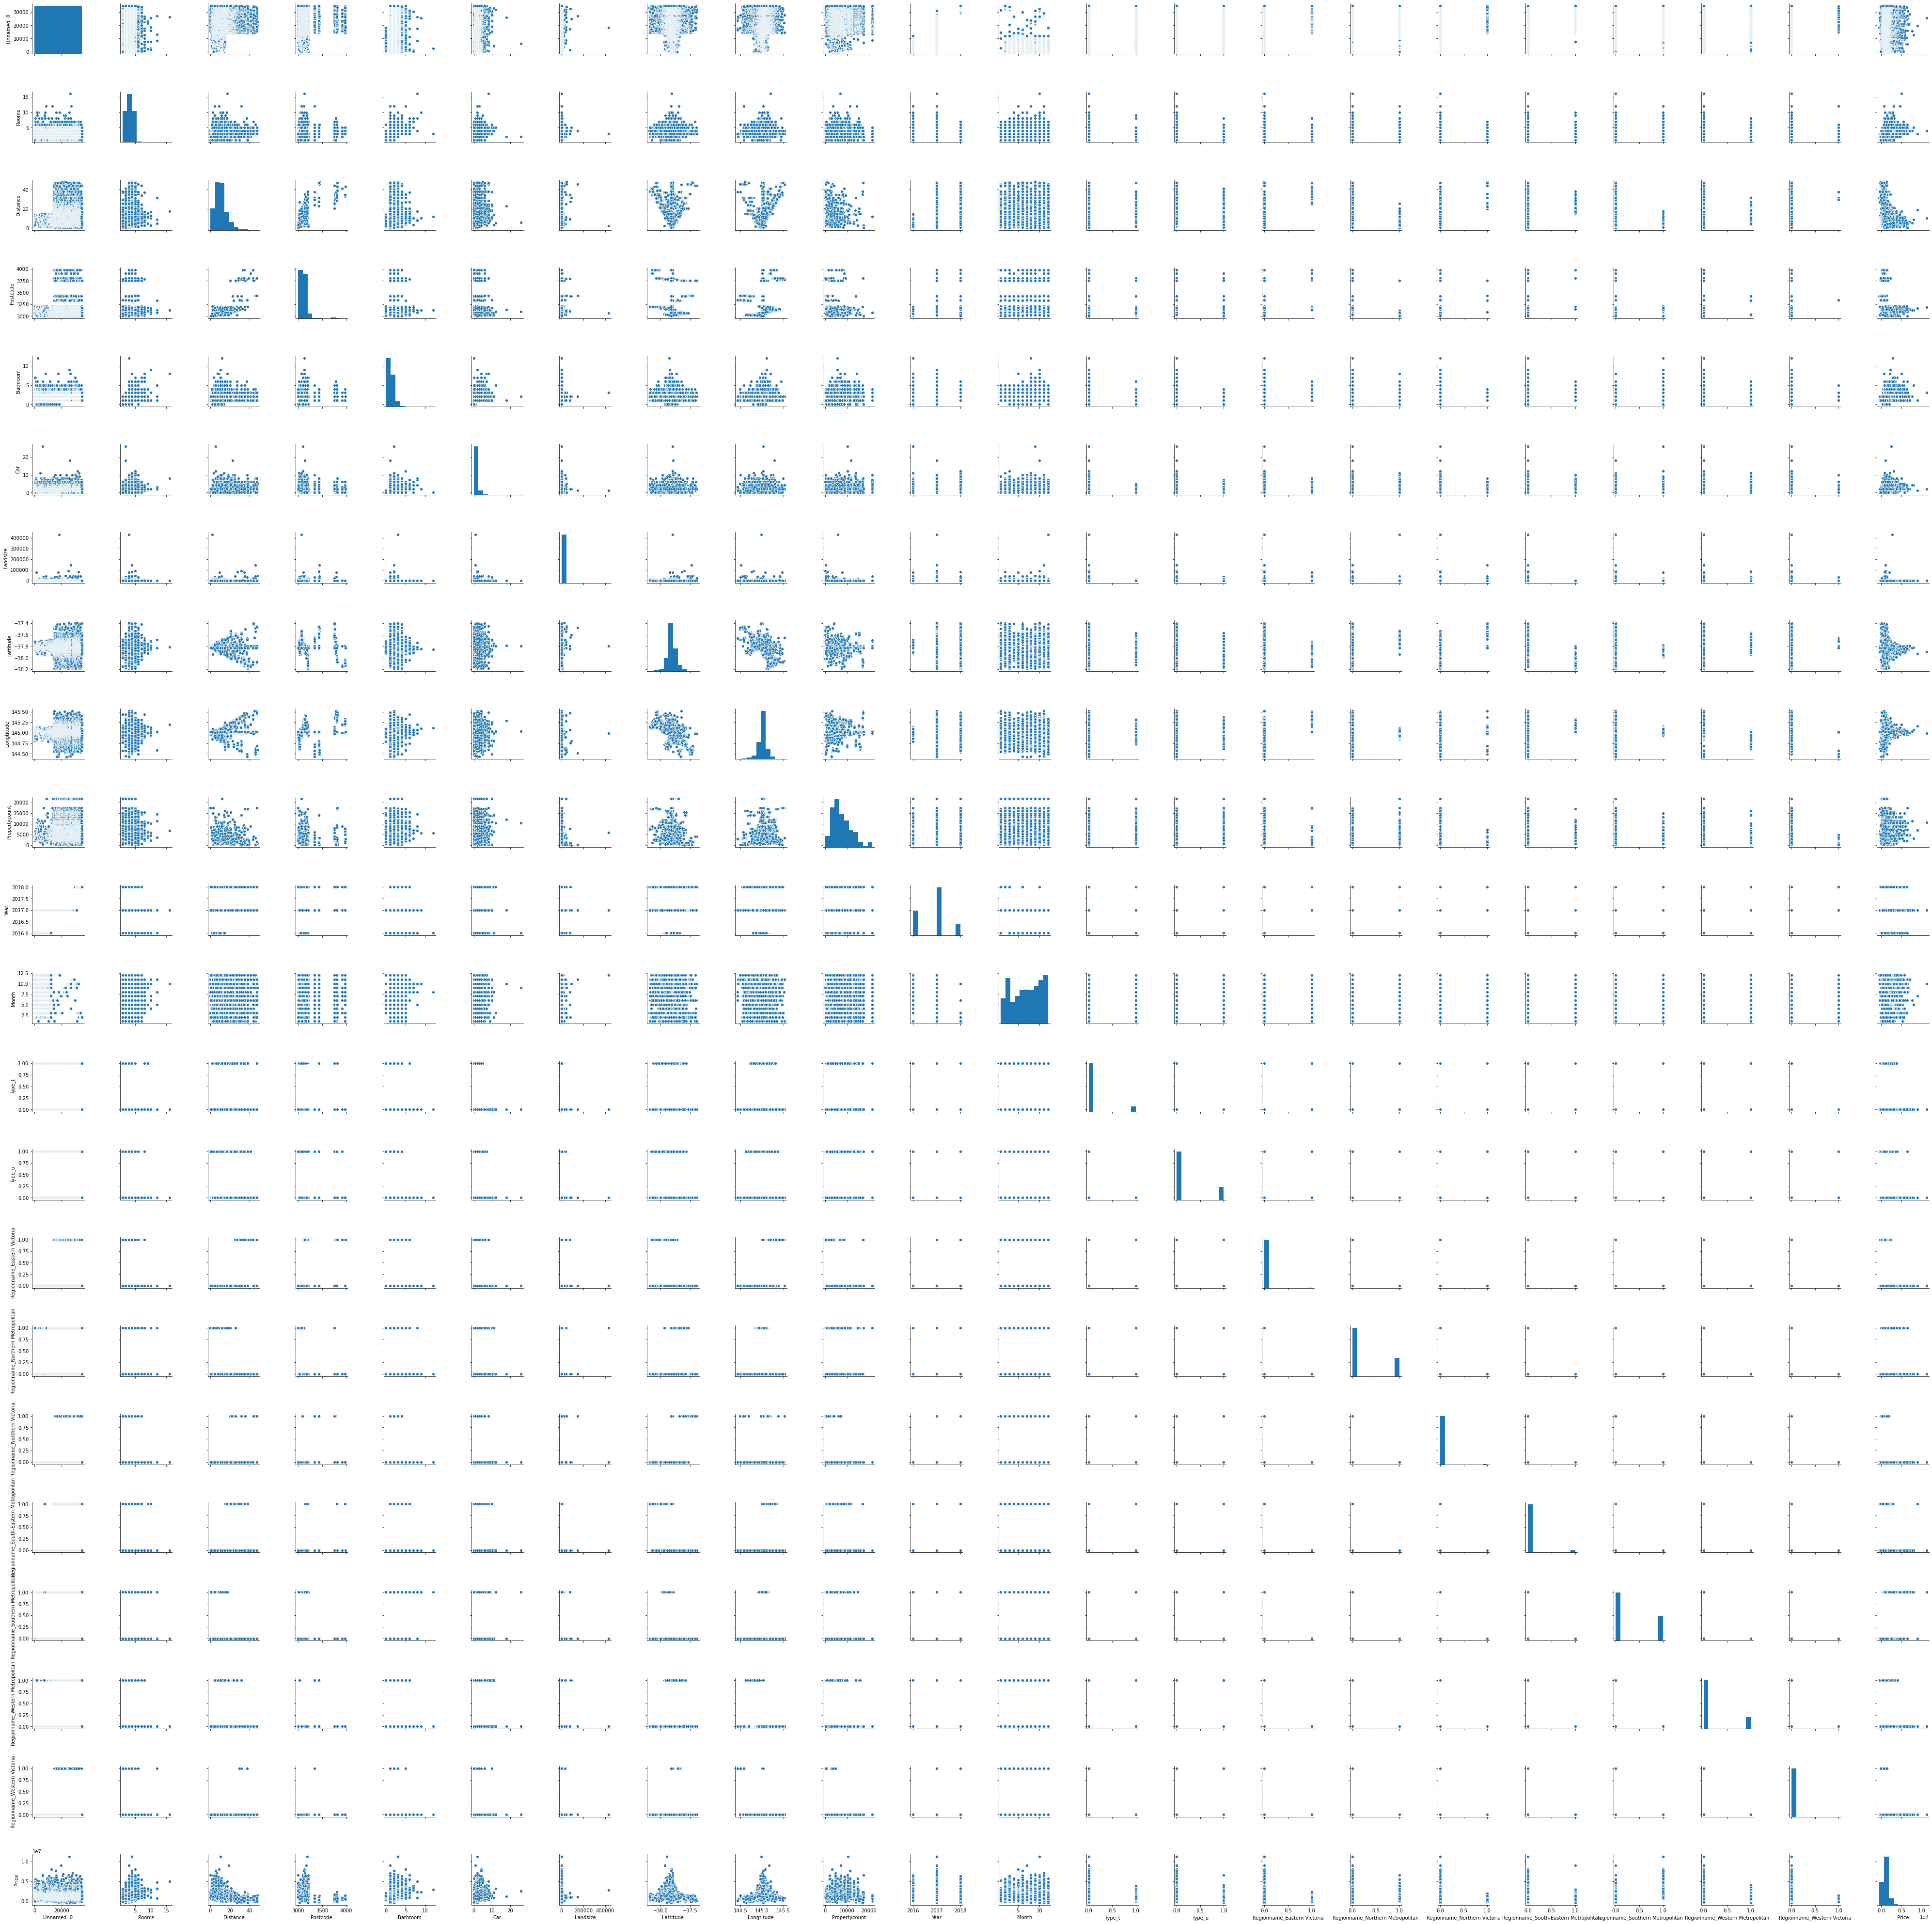

In [3]:
#plot the pairplot in dataset
sns.pairplot(data=df)

## Outlier

In [4]:
def outlier(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR= Q3-Q1
        LE=Q1-1.5*IQR
        UE=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LE,LE)
        df[i]=df[i].mask(df[i]>UE,UE)
    return df

In [5]:
df=outlier(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df.drop('Price',axis=1)
y=df['Price']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()


In [10]:
#fit the model into the data
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [11]:
pred1=rfg.predict(x_test)
pred1

array([1170251.89,  603215.71, 1426733.81, ...,  600006.58, 1062531.46,
        437095.  ])

In [12]:
from sklearn import metrics

In [13]:
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,pred1))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,pred1))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,pred1)))
print("r2 score: ",metrics.r2_score(y_test,pred1))
print('Mean : ',df['Price'].mean())

Mean Absoluted Error:  170249.01714572575
Mean Squared Error:  60095272136.91248
Root Mean Squared Error:  245143.37057508304
r2 score:  0.7883220722960677
Mean :  1073534.5980434346


## HyperParameter Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [15]:
#no of trees in RandomForest 
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#no of features consider at every split
max_features=['sqrt','auto']
#maximum no of levels in a tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum no of samples required to splitting a node
min_samples_split=[1,2,5,6,10,100]
#minimum samples required at each leaf node
min_samples_leaf=[1,2,5,6,9,10]
#create random_grid
random_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'auto'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [1, 2, 5, 6, 10, 100], 'min_samples_leaf': [1, 2, 5, 6, 9, 10]}


In [16]:
rfd=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rfd,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=33,verbose=2,n_jobs=-1)

In [17]:
#fit the randomized model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 5, 6, 9, 10],
                                        'min_samples_split': [1, 2, 5, 6, 10,
                                                              100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=33, scoring='neg_mean_squared_error',
                   verbose=2)

In [18]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [19]:
best_random_grid=rf_random.best_estimator_
best_random_grid

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=800)

In [20]:
predictions=best_random_grid.predict(x_test)

In [21]:
predictions

array([1195712.67784518,  602519.90255154, 1456763.43539657, ...,
        621561.94001876, 1065077.58433998,  530875.90185508])

In [22]:
from sklearn import metrics

In [23]:
print("Mean Absoluted Error: ",metrics.mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("r2 score: ",metrics.r2_score(y_test,predictions))
print('Mean : ',df['Price'].mean())

Mean Absoluted Error:  168247.08962792702
Mean Squared Error:  56506976199.52211
Root Mean Squared Error:  237711.96057313168
r2 score:  0.8009613868545367
Mean :  1073534.5980434346


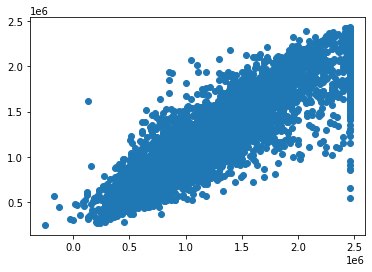

In [24]:
plt.scatter(y_test,predictions)

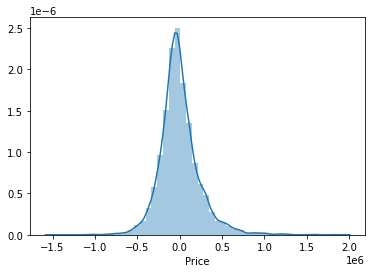

In [25]:
sns.distplot(y_test-predictions)

Text(0.5, 0, 'Relative Importance')

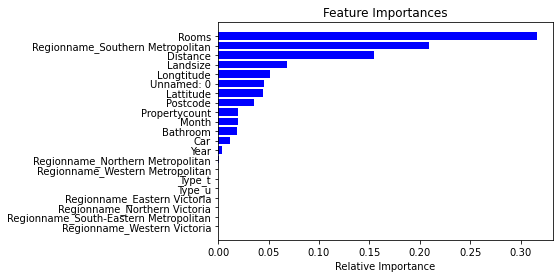

In [26]:
#let us find feature importance now i.e which feature is most important for this problem
rfd.fit(x_train,y_train)
features=x.columns
importances = rfd.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')